# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

## ССЫЛКИ НИЖЕ ##

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.
тест A: https://contest.yandex.ru/contest/31332/run-report/59282613/
тест B: https://contest.yandex.ru/contest/31332/run-report/59290277/

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/hw5code.py
# !wget https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]


In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

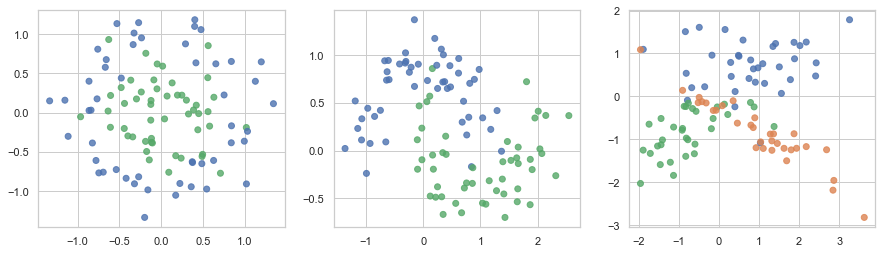

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

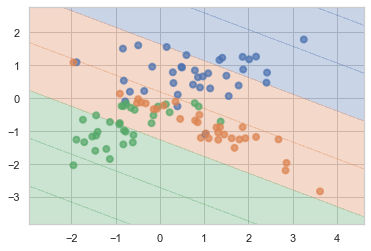

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

accuracy, train: 1.0
accuracy, test: 0.76


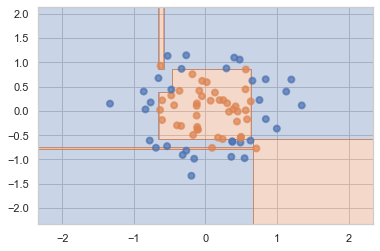

accuracy, train: 1.0
accuracy, test: 0.92


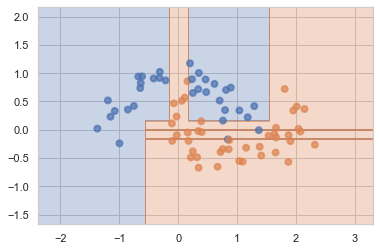

accuracy, train: 1.0
accuracy, test: 0.72


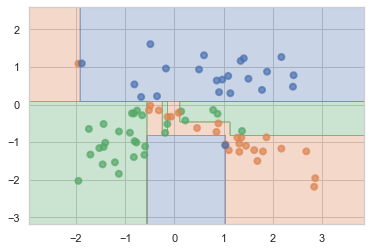

In [8]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
for i, (x, y) in enumerate(datasets):
    
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
    lr  = DecisionTreeClassifier().fit(X_train, y_train)
    plot_surface(lr, X_train, y_train)
    y_pred = np.abs(
    np.round_(
        np.where(
            lr.predict(X_test)<0, 0, lr.predict(X_test)
            )
        )
    )
    y_pred_train =  np.abs(
    np.round_(
        np.where(
            lr.predict(X_train)<0, 0, lr.predict(X_train)
            )
        )
    )
    
    print(f'accuracy, train: {metrics.accuracy_score(y_train, y_pred_train)}')
    print(f'accuracy, test: {metrics.accuracy_score(y_test, y_pred)}')
    plt.show()

__Ответ:__ Заметно. На всех трейнах точность = 1, когда на тесте она (кроме второго) значительно ниже


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

DATASET 0 

max depth:2, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.72


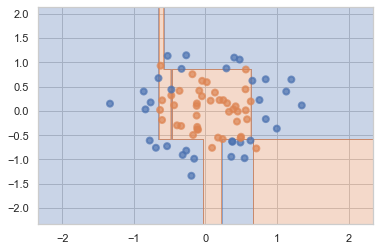

max depth:2, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.76


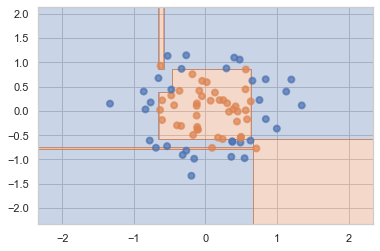

max depth:2, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.76


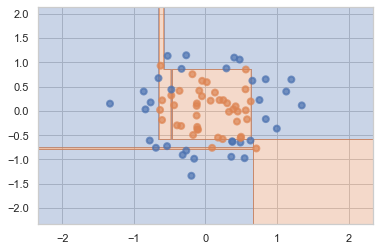

max depth:2, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.76


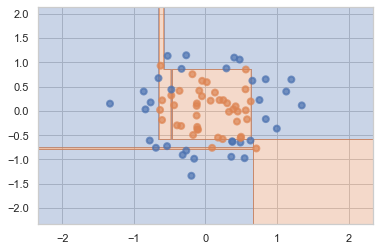

max depth:10, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.76


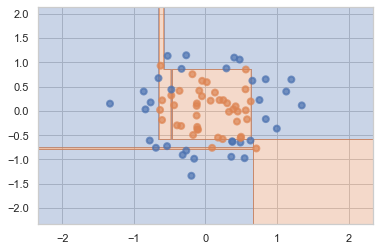

max depth:10, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.72


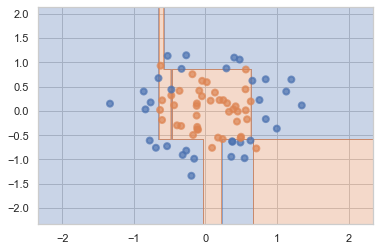

max depth:10, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.76


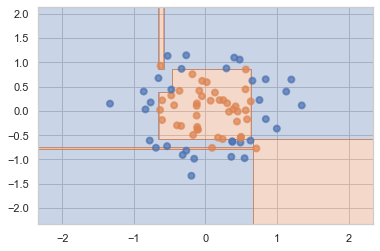

max depth:10, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.72


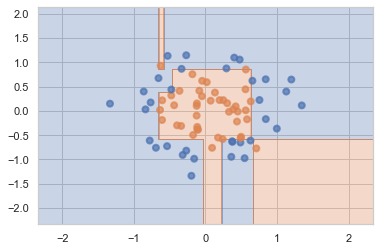

max depth:40, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.72


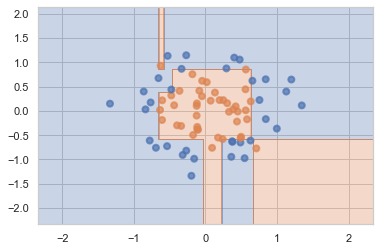

max depth:40, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.76


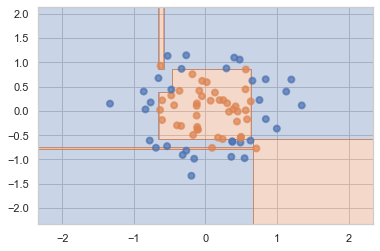

max depth:40, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.76


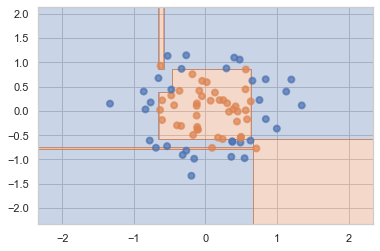

max depth:40, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.72


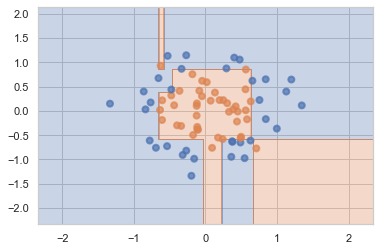

DATASET 1 

max depth:2, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.92


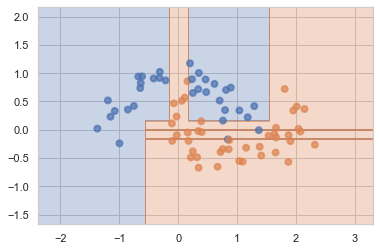

max depth:2, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.92


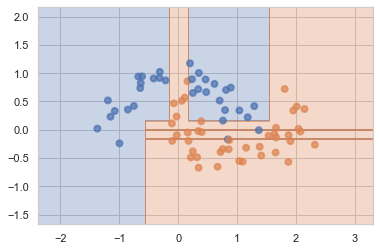

max depth:2, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.92


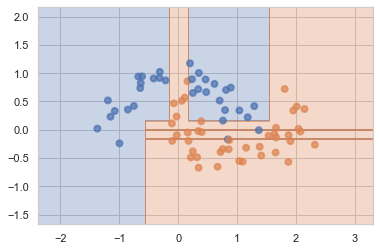

max depth:2, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.92


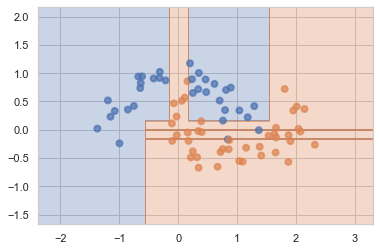

max depth:10, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.92


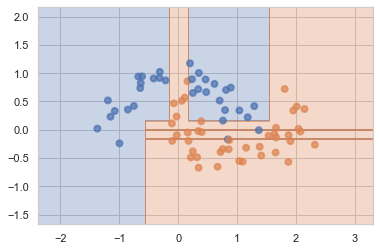

max depth:10, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.92


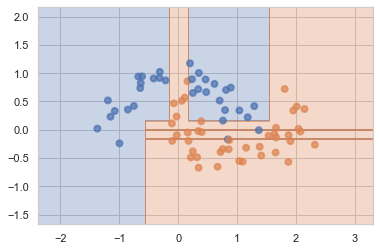

max depth:10, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.92


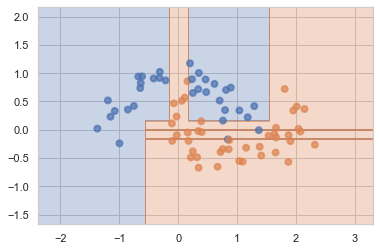

max depth:10, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.92


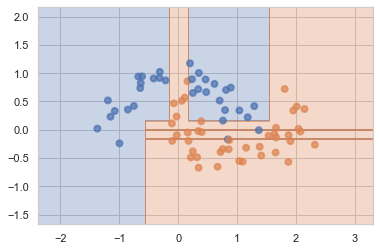

max depth:40, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.92


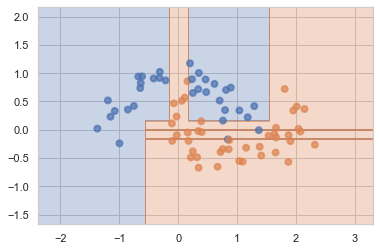

max depth:40, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.92


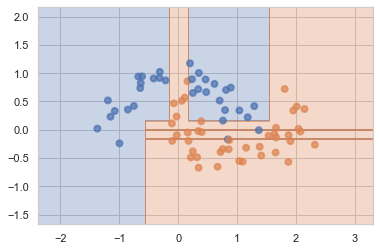

max depth:40, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.92


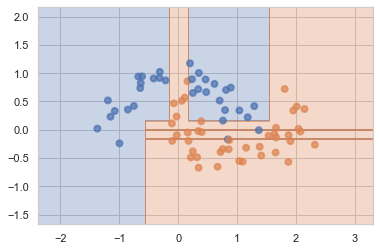

max depth:40, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.92


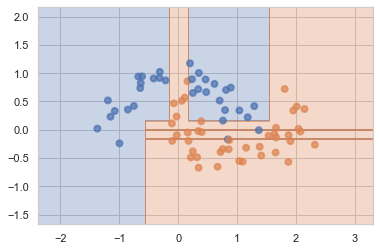

DATASET 2 

max depth:2, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.72


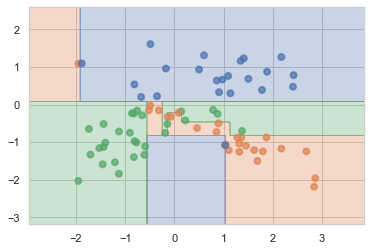

max depth:2, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.72


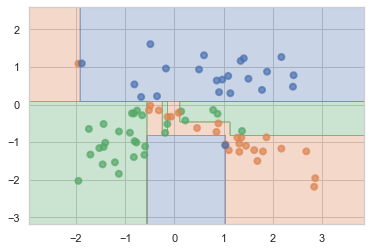

max depth:2, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.72


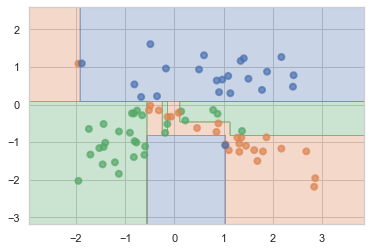

max depth:2, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.72


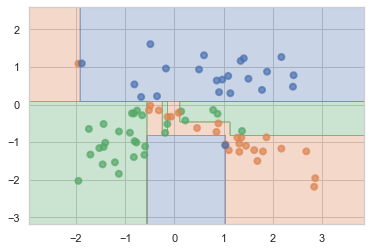

max depth:10, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.72


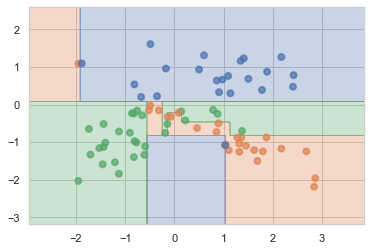

max depth:10, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.72


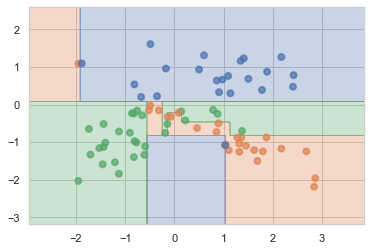

max depth:10, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.72


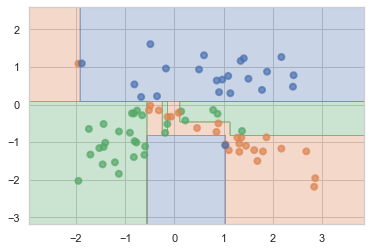

max depth:10, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.72


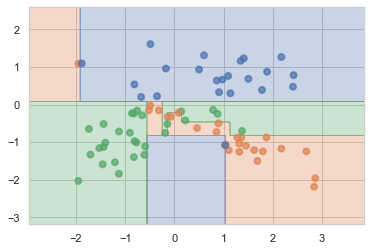

max depth:40, min samples leaf: 1
accuracy, train: 1.0
accuracy, test: 0.72


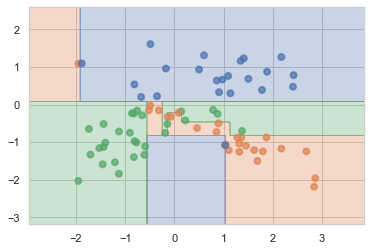

max depth:40, min samples leaf: 10
accuracy, train: 1.0
accuracy, test: 0.72


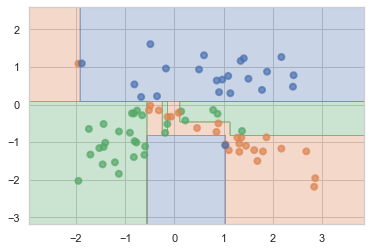

max depth:40, min samples leaf: 30
accuracy, train: 1.0
accuracy, test: 0.72


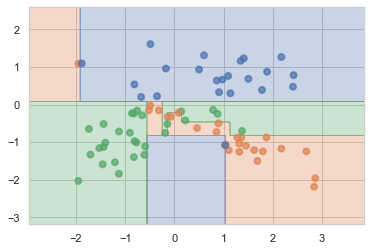

max depth:40, min samples leaf: 50
accuracy, train: 1.0
accuracy, test: 0.72


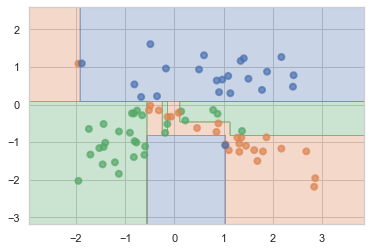

In [9]:
for i, (x, y) in enumerate(datasets):
    print(f'DATASET {i} \n')
    for j in [2, 10, 40]:
        for k in [1, 10, 30, 50]:
            
            X, y = datasets[i]
            X_train, X_test, y_train, y_test = train_test_split(X, 
                                                                y, 
                                                                random_state=42, 
                                                                shuffle=True)
            
            lr  = DecisionTreeClassifier().fit(X_train, y_train)
            

            plot_surface(lr, X_train, y_train)
            y_pred = np.abs(
            np.round_(
                np.where(
                    lr.predict(X_test)<0, 0, lr.predict(X_test)
                    )))
            y_pred_train =  np.abs(
            np.round_(
                np.where(
                    lr.predict(X_train)<0, 0, lr.predict(X_train)
                    )))
            print(f'max depth:{j}, min samples leaf: {k}')
            print(f'accuracy, train: {metrics.accuracy_score(y_train, y_pred_train)}')
            print(f'accuracy, test: {metrics.accuracy_score(y_test, y_pred)}')
            
            plt.show()

__Ответ:__ Изменения видны только в первом. Видимо, из-за того, что датасеты достаточно простые деревья не способны в этом примере слишком переобучиться


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
df = pd.read_csv('students.csv')
df = df.rename(columns={' UNS': 'UNS'})

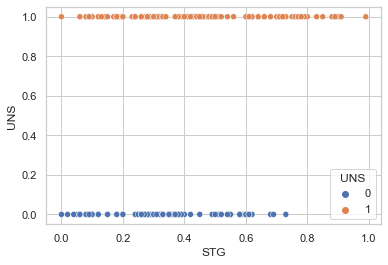

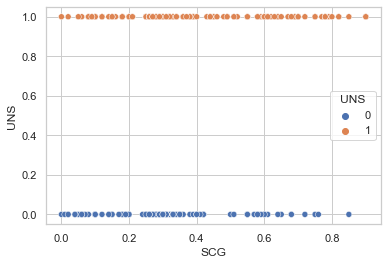

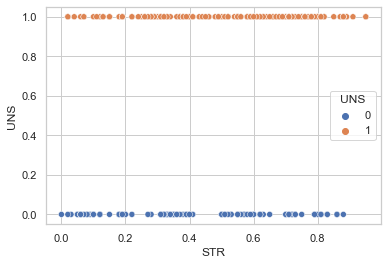

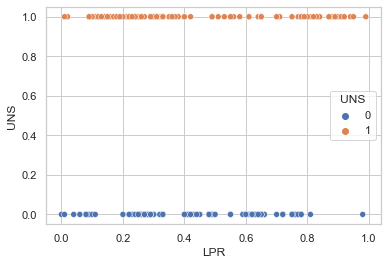

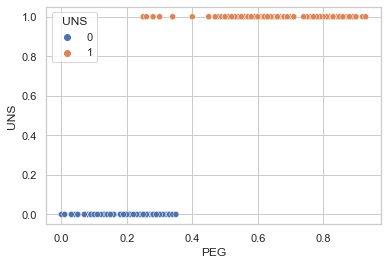

In [11]:
for feature in df.columns[:-1]:
    sns.scatterplot(x=f'{feature}', y='UNS', hue='UNS', data=df)
    plt.show()

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.ƒ

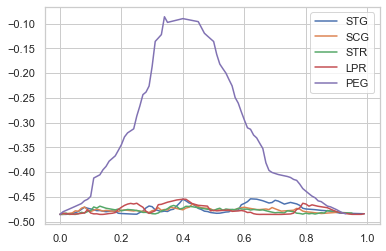

In [12]:
# суть задания: для каждого признака по порогу посмотреть соотношение классов через Джини
# Джини = p_k1(1-p_k1) + p_k2(1-p_k2)

def gini(p_1class, p_2class, rl, rr, r):
    
    h_r = 1 - p_1class ** 2 - (1 - p_1class) ** 2
    h_l = 1 - p_2class ** 2 - (1 - p_2class) ** 2    
    return - (rl / r) * h_l - (rr / r) * h_r

target = df['UNS']

for feature in df.columns[:-1]:
    f = df[f'{feature}']
    values = np.sort(f.unique())
    gini_plot = []

    for t in values:
        condition = np.where(f >= t, True, False)
        rpart = target[condition]
        lpart = target[~condition]

        if len(rpart) == 0:
            r_p = 0
            l_p = sum(lpart)/len(lpart)
            gini_plot.append(gini(r_p, l_p, len(lpart), len(rpart), len(f)))

        elif len(lpart) == 0:
            l_p = 0
            r_p = sum(rpart)/len(rpart)
            gini_plot.append(gini(r_p, l_p, len(lpart), len(rpart), len(f)))

        else:
            r_p = sum(rpart)/len(rpart)
            l_p = sum(lpart)/len(lpart)
            gini_plot.append(gini(r_p, l_p, len(lpart), len(rpart), len(f)))
            
    sns.lineplot(values, gini_plot, label=f'{feature}', x='Порог', y='Джини')

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** по PEG - у него практически линейная разделимость как мы это видим по scatter-plot.
У идеальных признаков линия выпуклая, где-то по середине критерий Джини близое к нулю,
у плохих признаков линия, наоборот, стремится к прямой

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
from sklearn.preprocessing import LabelEncoder
mushrooms= pd.read_csv('agaricus-lepiota.data')

In [14]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [15]:
np.random.seed(42)

In [16]:
from sklearn.model_selection import train_test_split
from hw5code_new import DecisionTree
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)

y_m = mushrooms['p']
X_m = mushrooms.drop('p', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.5, random_state=10)
X_train.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
4455,2,0,3,0,2,1,0,0,2,0,...,1,4,0,0,2,1,2,1,5,4
6434,2,2,4,0,7,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
6363,2,2,2,0,8,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,2
2152,2,0,2,1,5,1,0,0,7,1,...,2,7,3,0,2,1,4,3,4,0
1662,5,2,9,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [17]:
from hw5code_new import DecisionTree

In [18]:
%%time
mushroom_tree = DecisionTree(['categorical'] * 22)
mushroom_tree.fit(np.array(X_train), np.array(y_train))

y_pred = mushroom_tree.predict(np.array(X_test))
print(metrics.accuracy_score(y_test, y_pred))

1.0
CPU times: user 493 ms, sys: 4.69 ms, total: 498 ms
Wall time: 505 ms


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [19]:
tic_tac = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [20]:
tic_tac = tic_tac.apply(LabelEncoder().fit_transform)
cars = cars.apply(LabelEncoder().fit_transform)
nursery = nursery.apply(LabelEncoder().fit_transform)

In [21]:
tic_tac.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [22]:
tic_tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   x         957 non-null    int64
 1   x.1       957 non-null    int64
 2   x.2       957 non-null    int64
 3   x.3       957 non-null    int64
 4   o         957 non-null    int64
 5   o.1       957 non-null    int64
 6   x.4       957 non-null    int64
 7   o.2       957 non-null    int64
 8   o.3       957 non-null    int64
 9   positive  957 non-null    int64
dtypes: int64(10)
memory usage: 74.9 KB


In [23]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1727 non-null   int64
 1   vhigh.1  1727 non-null   int64
 2   2        1727 non-null   int64
 3   2.1      1727 non-null   int64
 4   small    1727 non-null   int64
 5   low      1727 non-null   int64
 6   unacc    1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [25]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,1
1,2,3,0,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2,2
3,2,3,0,0,0,0,2,1,1
4,2,3,0,0,0,0,2,0,0


In [26]:
nursery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   usual         12959 non-null  int64
 1   proper        12959 non-null  int64
 2   complete      12959 non-null  int64
 3   1             12959 non-null  int64
 4   convenient    12959 non-null  int64
 5   convenient.1  12959 non-null  int64
 6   nonprob       12959 non-null  int64
 7   recommended   12959 non-null  int64
 8   recommend     12959 non-null  int64
dtypes: int64(9)
memory usage: 911.3 KB


In [27]:
all_scores = pd.DataFrame(index=["mushrooms", 'tic_tac', 'cars', 'nursery'],
                         columns=['sklearn', ])

# не успела разобраться с CV(

In [28]:
# DecisionTree, считающий все признаки вещественными
# DecisionTree, считающий все признаки категориальными

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from tqdm import tqdm
# CATEGORICAL, REAL 
for method in tqdm(['real', 'categorical']):
    for dataset, name in [[mushrooms, 'mushrooms'],
                               [tic_tac, 'tic_tac'], 
                               [cars, 'cars'], 
                               [nursery, 'nursery']]:
        

        chunks = np.array_split(dataset, 10)

        score_ = []
        for i in range(len(chunks)):
            if name == 'mushrooms':
                X_test, y_test = chunks[i].drop('p', axis=1), chunks[i]['p']                                         
                train = pd.concat(np.delete(chunks, i))                                                        
                X_train, y_train = train.drop('p', axis=1), train['p']

            else:
                X_test, y_test = chunks[i][chunks[i].columns[:-1]], chunks[i][chunks[i].columns[-1]]
                train = pd.concat(np.delete(chunks, i))
                X_train, y_train = train[train.columns[:-1]], train[train.columns[-1]]
            
            tree =  DecisionTree([method] * len(train.columns))
            tree.fit(np.array(X_train), np.array(y_train))
            y_pred = tree.predict(np.array(X_test))
            score_.append(metrics.accuracy_score(y_test, y_pred))
        all_scores.at[name, method] = np.mean(score_)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:39<00:00, 19.65s/it]


In [30]:
# DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
for dataset, name in [[mushrooms, 'mushrooms'],
                               [tic_tac, 'tic_tac'], 
                               [cars, 'cars'], 
                               [nursery, 'nursery']]:
        
        dataset = pd.get_dummies(dataset, sparse=True)
        chunks = np.array_split(dataset, 10)
        

        score_ = []
        for i in range(len(chunks)):
            if name == 'mushrooms':
                X_test, y_test = chunks[i].drop('p', axis=1), chunks[i]['p']                                         
                train = pd.concat(np.delete(chunks, i))                                                        
                X_train, y_train = train.drop('p', axis=1), train['p']

            else:
                X_test, y_test = chunks[i][chunks[i].columns[:-1]], chunks[i][chunks[i].columns[-1]]
                train = pd.concat(np.delete(chunks, i))
                X_train, y_train = train[train.columns[:-1]], train[train.columns[-1]]
            
            
            tree =  DecisionTree(['real'] * len(train.columns))
            tree.fit(np.array(X_train), np.array(y_train))
            y_pred = tree.predict(np.array(X_test))
            score_.append(metrics.accuracy_score(y_test, y_pred))
        all_scores.at[name, 'dummy'] = np.mean(score_)

In [31]:
#sklearn
for dataset, name in [[mushrooms, 'mushrooms'],
                      [tic_tac, 'tic_tac'], 
                      [cars, 'cars'], 
                      [nursery, 'nursery']]:
    if name == 'mushrooms':
        y_m = mushrooms['p']
        X_m = mushrooms.drop('p', axis=1)
    else:
        X, y = dataset[dataset.columns[:-1]], dataset[dataset.columns[-1]]

    score_ = np.mean(cross_val_score(DecisionTreeClassifier(), 
                          X, y, 
                          cv=10, 
                          scoring=metrics.make_scorer(metrics.accuracy_score)))
    all_scores.at[name, 'sklearn'] = score_

In [32]:
all_scores

,sklearn,real,categorical,dummy
mushrooms,0.76,0.999261,1.000000,0.999261
tic_tac,0.780888,0.467939,0.549265,0.467939
cars,0.863456,0.882975,0.903300,0.882975
nursery,0.799987,0.901157,0.910879,0.901157


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** можно предположить, что для дерева важным параметром является именно "вес" категории относительно остальных элементов, чем значение
Это показывает разница между скором в вещественных значениях и категориальных
Также можно заметить по одинаковым результатам в ohe и вещественных, что на дерево никак не влияет разделение (если мы также не рассматриваем именно вес). 
Наиболее "угадываемым" стал датасет грибов (гыгы) - скорее всего там самые информативные признаки, самый худший рез показал tic_tac.
Для наилучшего результата нужно брать либо дерево из sklearn, либо, если делать свое, работать с "весами" значений признака

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
import os
url1 = 'https://www.5-nt.ru/Storage/Image/BlogItemGardener/Image/big/3161/kipkp.jpg'
os.system('wget {}'.format(url1))

![](https://www.5-nt.ru/Storage/Image/BlogItemGardener/Image/big/3161/kipkp.jpg)